In [31]:
#pip install Graphhviz 决策树

'C:\\Data\\Jupyter_file\\机器学习'

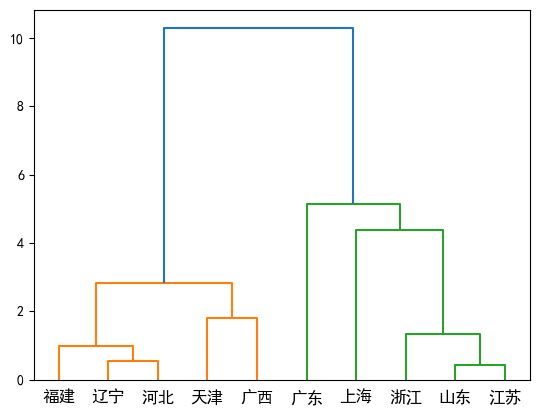

In [35]:
#层次聚类 用另一个框架，关于数据科学的
import scipy.cluster.hierarchy as sch
#计算点-点距离 生成欧式距离矩阵
dis_mat=sch.distance.pdist(city_fa[["Gross","Avg"]],metric="euclidean")
#计算类-类之间的距离,ward最小方差法
Z=sch.linkage(dis_mat,method="ward")
#将层次聚类结果层次聚类图
P=sch.dendrogram(Z,labels=city_fa["AREA"].tolist())
plt.savefig("我的层次聚类图312.png")

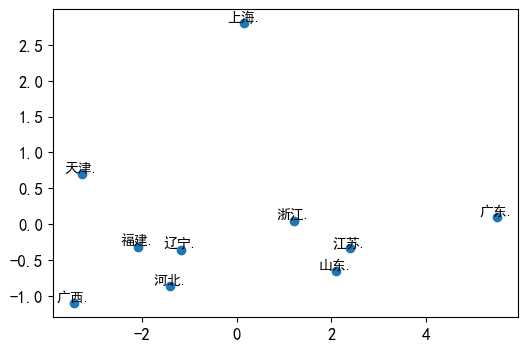

In [30]:
scatter(city_fa['Gross'],city_fa['Avg'],city_fa['AREA'])

In [28]:
#画面图
plt.rcParams['font.family'] = 'SimHei'#'SimHei' #'Heiti TC'
from pylab import mpl
from pylab import mpl
mpl.rcParams['axes.unicode_minus'] = False

def scatter(x, y, labels, **kw):

    plt.figure(figsize=(6, 4))
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.scatter(x, y)
    for xx, yy, label in zip(x, y, labels):
        plt.text(xx, yy, '%s.' % label,
                 ha='center', va='bottom', **kw)
plt.show()

In [27]:
city_fa = df.join(pd.DataFrame(score))
city_fa=city_fa.rename(columns={0:'Gross',1:'Avg'})
city_fa.head()

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9,Gross,Avg
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7,-1.174241,-0.364178
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2,2.095775,-0.654819
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3,-1.399899,-0.870629
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8,-3.265185,0.698849
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7,2.386557,-0.337666


In [16]:
#输出 因子得分
score = fa.get_component_scores(std_data)
score

array([[-1.17424096, -0.36417758],
       [ 2.09577546, -0.65481866],
       [-1.39989919, -0.87062921],
       [-3.26518525,  0.69884893],
       [ 2.38655652, -0.33766605],
       [ 0.16390126,  2.80289359],
       [ 1.20901169,  0.04811557],
       [-2.08449972, -0.3221728 ],
       [ 5.5017592 ,  0.10513772],
       [-3.43317901, -1.10553148]])

In [15]:
#最大方差拉升旋转,看数据 的变异方向
fa.rotate_components(method='varimax')
#因子的载荷矩阵（权重距阵）
fa.comps['rot']  #表示两个主要因子的权重系数


array([[ 0.36287997, -0.19604704],
       [-0.00194704,  0.94364822],
       [ 0.36422208,  0.00656524],
       [ 0.36925509, -0.02877546],
       [ 0.36125764,  0.11159649],
       [ 0.35279873, -0.00714436],
       [ 0.37014035, -0.11869071],
       [ 0.29509869,  0.06139991],
       [ 0.34676526,  0.19965023]])

In [14]:
#因子分析
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting
#实例化
fa=FactorAnalysis.load_data_samples(
    std_data,
    preproc_demean=True,
    preproc_scale=True
    )
fa.extract_components()
#设定提取主成分的方法
fa.find_comps_to_retain(method='top_n',num_keep=2)

array([0, 1], dtype=int64)

In [13]:
sum(pca.explained_variance_ratio_)

0.9232788705681052

In [12]:
#主成分分析 PCA 确定需要几个主成分
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(std_data)
#查看方差特征
pca.explained_variance_
#查看方差比率
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

PCA(n_components=2)

array([8.01129553, 1.22149318])

array([0.80112955, 0.12214932])

In [11]:
#数据标准化
from sklearn import preprocessing
std_data= preprocessing.scale(model_data)
std_data
#本地化化的第三种方法
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# std_data = scaler.fit_transform(model_data)

array([[-0.37574772, -0.33589708, -0.57070001, -0.33180084, -0.4351153 ,
        -0.68608742, -0.13882664, -0.44958874, -0.36008526],
       [ 1.19924012, -0.48315182,  1.14473196,  0.98455823,  0.79990984,
         0.8650543 ,  0.66401891, -0.27809633,  0.34976628],
       [-0.18446517, -0.76485655, -0.54609356, -0.46884237, -0.63100796,
        -0.49108511, -0.39102534, -0.60224445, -0.68853914],
       [-1.43844228,  0.6481162 , -1.01716572, -1.40498973, -1.21233816,
        -1.16457327, -1.28376177, -0.46528598, -1.12861338],
       [ 1.2259343 , -0.18430174,  1.17200074,  1.08060301,  0.83964698,
         1.06721529,  0.6934899 ,  0.0625339 ,  0.46273553],
       [-0.39102805,  2.66204455,  0.09085021,  0.07932373,  0.3955559 ,
         0.03063913, -0.33286576, -0.06343649,  0.68294126],
       [ 0.3084029 ,  0.05150118,  0.22017521,  0.33489213,  0.80993934,
         1.17974966,  0.39938849, -0.11504119,  0.20374931],
       [-0.61584072, -0.28055447, -0.83620754, -0.66192379, -0

In [10]:
#判断 线性相关程度
model_data.columns=['GDP','人均GDP','工业增加值', '第三产业增加值','固定资产投资',
    '基本建设投资','社会消费总额','海关出口总额','地方财政收入']
model_data.head()

,GDP,人均GDP,工业增加值,第三产业增加值,固定资产投资,基本建设投资,社会消费总额,海关出口总额,地方财政收入
0,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [7]:
model_data.dtypes

X1    float64
X2      int64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
X9    float64
dtype: object

In [6]:
model_data.info

<bound method DataFrame.info of         X1     X2      X3      X4      X5      X6      X7      X8      X9
0   5458.2  13000  1376.2  2258.4  1315.9   529.0  2258.4   123.7   399.7
1  10550.0  11643  3502.5  3851.0  2288.7  1070.7  3181.9   211.1   610.2
2   6076.6   9047  1406.7  2092.6  1161.6   597.1  1968.3    45.9   302.3
3   2022.6  22068   822.8   960.0   703.7   361.9   941.4   115.7   171.8
4  10636.3  14397  3536.3  3967.2  2320.0  1141.3  3215.8   384.7   643.7
5   5408.8  40627  2196.2  2755.8  1970.2   779.3  2035.2   320.5   709.0
6   7670.0  16570  2356.5  3065.0  2296.6  1180.6  2877.5   294.2   566.9
7   4682.0  13510  1047.1  1859.0   964.5   397.9  1663.3   173.7   272.9
8  11769.7  15030  4224.6  4793.6  3022.9  1275.5  5013.6  1843.7  1201.6
9   2455.4   5062   367.0   995.7   542.2   352.7  1025.5    15.1   186.7>

In [5]:
#获取需要的特征，去年分类变量
model_data=df.loc[:,'X1':]
model_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [4]:
df= pd.read_csv('cities_10.csv',encoding='gbk')
df.head()
#X1:GDP; X2:人均GDP，X3：工业增加值 ； X4：第三产业增加值，X5：固定资产投资
#X6：基本建设投资； X7：社会消费总额 ，X8：海关出口总额 ； X9：地方财政收入

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'C:\Data\Jupyter_file\机器学习')

In [1]:
#全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"